In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE

In [9]:
data = pd.read_csv('bankloan.csv')
# dataset to predict if bankloan is approved or not, based on other factors such as age, income, etc

print(data.columns)
data_info = data.info()
data_head = data.head()
data
# we will need to encode the 'Sex' and 'Anaemic' columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   i

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


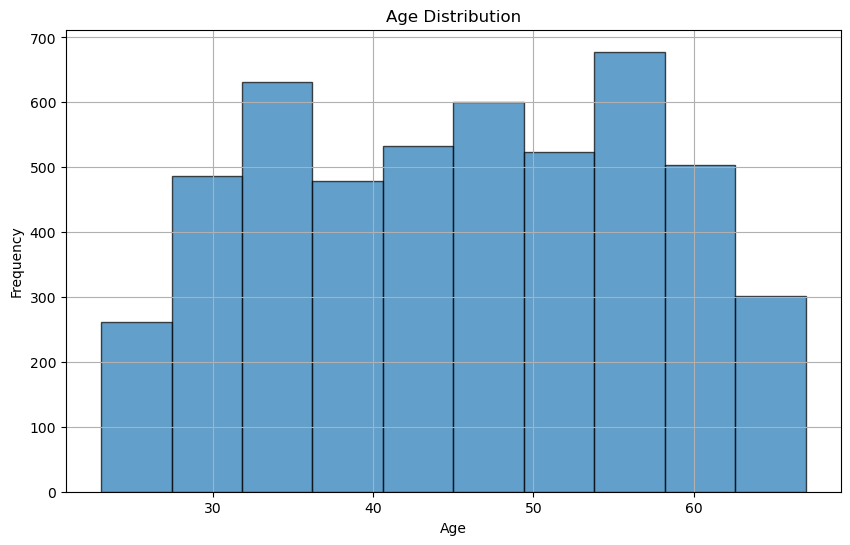

In [33]:
# people applying are generally 20-60 years old
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], edgecolor='k', alpha=0.7)  # edgecolor adds a boundary to each bar
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

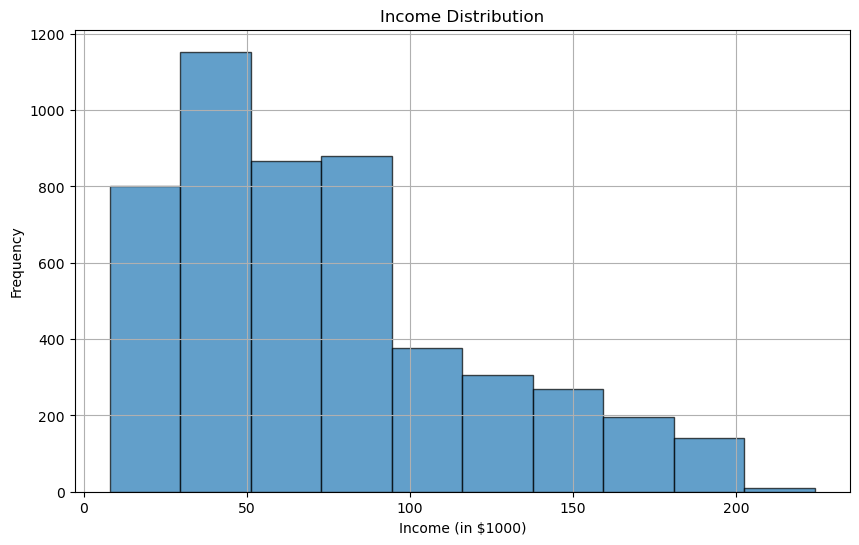

In [34]:
# generally people around income $50k are applying most often
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], edgecolor='k', alpha=0.7)  # edgecolor adds a boundary to each bar
plt.title('Income Distribution')
plt.xlabel('Income (in $1000)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

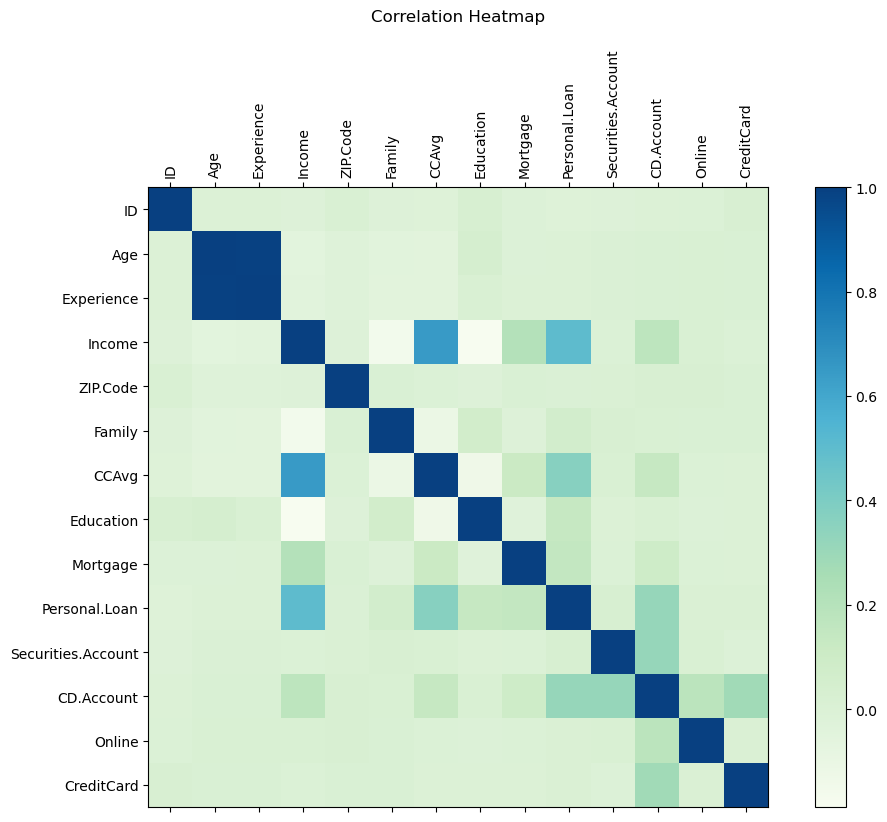

In [45]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()  # calculates correlation matrix
cax = plt.matshow(corr_matrix, cmap='GnBu', fignum=1)
plt.colorbar(cax)  # adds a color legend key
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Heatmap', pad=20)
plt.show()

# this shows us clearly which columns affect approval the most
# those are: Income, Credit Card Average Score, CD Account, Education, Mortgage, and Family

In [11]:
features = data.drop(columns=['ID', 'Personal.Loan'])
# id is not relevant to the outcome
# personal loan is the target data, 1 for 'approved', 0 for 'not approved

target = data['Personal.Loan']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [16]:
model = LogisticRegression()
model.fit(X_train_norm, y_train)

LogisticRegression()

In [46]:
# feature selection method 
# fits a model and removes the weakest features until the specified number of features is reached
selector = RFE(model, n_features_to_select=6, step=1)
selector = selector.fit(X_train_norm, y_train)

print(selector.support_)  # which features are selected
print(selector.ranking_)  # 1 --> feature selected

[False False  True False  True False  True False False  True  True  True]
[3 2 1 6 1 5 1 7 4 1 1 1]


In [47]:
# to fit model with selected features
model.fit(X_train_norm[:, selector.support_], y_train)

LogisticRegression()

In [48]:
w = model.coef_
b = model.intercept_
print(f'weights: {w} \n bias: {b}')

weights: [[ 2.52001245  0.81278323  1.30382883  0.79386018 -0.27467378 -0.51098489]] 
 bias: [-4.52741576]


In [49]:
y_pred = model.predict(X_test_norm[:, selector.support_])  # selected features only
print(f"\nPrediction on test set:\n{list(y_pred[:30])}" )
print(f"Target values \n{list(y_test[:30])}")


Prediction on test set:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Target values 
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [50]:
# accuracy_score(y_test, y_pred)
print(f'Accuracy on test set:', model.score(X_test_norm[:, selector.support_], y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on test set: 0.951
Confusion Matrix:
 [[883  12]
 [ 37  68]]


In [52]:
# 883 True negatives
# 12 False positives
# 37 False negatives
# 68 True positives